# Real Estate Data

The purpose of this notebook is to analyze residential real estate financial data from 1996 - 2020, and to see if we can apply a time series model to the data to see if there's any predictive power in residential real estate prices from previous year's prices.

In [1]:
# Make necessary imports - pandas and numpy
import numpy as np
import pandas as pd

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in dataset
states = pd.read_csv('../datasets/zillow_real_estate_prices_by_state.csv')

# Check head
states.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
0,9,0,California,State,CA,160283.0,160056.0,159909.0,159622.0,159428.0,...,560557.0,563947.0,567488.0,570569.0,572537.0,574440.0,578358.0,584544.0,591809.0,599159.0
1,54,1,Texas,State,TX,99737.0,99762.0,99791.0,99920.0,100060.0,...,214248.0,214724.0,215449.0,216301.0,217197.0,218140.0,219241.0,220550.0,222123.0,224065.0
2,43,2,New York,State,NY,142323.0,142000.0,141811.0,141524.0,141418.0,...,334030.0,334890.0,335720.0,336834.0,337956.0,339409.0,341277.0,343647.0,346550.0,349939.0
3,14,3,Florida,State,FL,100274.0,100370.0,100481.0,100691.0,100891.0,...,248670.0,249858.0,251186.0,252490.0,253749.0,254983.0,256235.0,257962.0,260023.0,262291.0
4,21,4,Illinois,State,IL,142962.0,142704.0,142378.0,141996.0,141471.0,...,209335.0,209605.0,210053.0,210484.0,210959.0,211552.0,212542.0,213879.0,215671.0,217672.0


In [3]:
# Drop unecessary / redundant columns
states.drop(columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType'], inplace = True)

# Check head
states.head()

,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
0,CA,160283.0,160056.0,159909.0,159622.0,159428.0,159276.0,159182.0,159167.0,159193.0,...,560557.0,563947.0,567488.0,570569.0,572537.0,574440.0,578358.0,584544.0,591809.0,599159.0
1,TX,99737.0,99762.0,99791.0,99920.0,100060.0,100179.0,100269.0,100393.0,100550.0,...,214248.0,214724.0,215449.0,216301.0,217197.0,218140.0,219241.0,220550.0,222123.0,224065.0
2,NY,142323.0,142000.0,141811.0,141524.0,141418.0,141351.0,141269.0,141185.0,141148.0,...,334030.0,334890.0,335720.0,336834.0,337956.0,339409.0,341277.0,343647.0,346550.0,349939.0
3,FL,100274.0,100370.0,100481.0,100691.0,100891.0,101120.0,101340.0,101538.0,101667.0,...,248670.0,249858.0,251186.0,252490.0,253749.0,254983.0,256235.0,257962.0,260023.0,262291.0
4,IL,142962.0,142704.0,142378.0,141996.0,141471.0,141160.0,140725.0,141201.0,141925.0,...,209335.0,209605.0,210053.0,210484.0,210959.0,211552.0,212542.0,213879.0,215671.0,217672.0


In [4]:
# Set dataframe index to be 'StateName'
states.set_index(states['StateName'], inplace = True)

# Now that the index has been set to 'StateName', we can drop that column from the dataframe
states.drop(columns = ['StateName'], inplace = True)

# Check work
states.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
StateName,,,,,,,,,,,,,,,,,,,,,
CA,160283.0,160056.0,159909.0,159622.0,159428.0,159276.0,159182.0,159167.0,159193.0,159343.0,...,560557.0,563947.0,567488.0,570569.0,572537.0,574440.0,578358.0,584544.0,591809.0,599159.0
TX,99737.0,99762.0,99791.0,99920.0,100060.0,100179.0,100269.0,100393.0,100550.0,100734.0,...,214248.0,214724.0,215449.0,216301.0,217197.0,218140.0,219241.0,220550.0,222123.0,224065.0
NY,142323.0,142000.0,141811.0,141524.0,141418.0,141351.0,141269.0,141185.0,141148.0,141167.0,...,334030.0,334890.0,335720.0,336834.0,337956.0,339409.0,341277.0,343647.0,346550.0,349939.0
FL,100274.0,100370.0,100481.0,100691.0,100891.0,101120.0,101340.0,101538.0,101667.0,101802.0,...,248670.0,249858.0,251186.0,252490.0,253749.0,254983.0,256235.0,257962.0,260023.0,262291.0
IL,142962.0,142704.0,142378.0,141996.0,141471.0,141160.0,140725.0,141201.0,141925.0,143421.0,...,209335.0,209605.0,210053.0,210484.0,210959.0,211552.0,212542.0,213879.0,215671.0,217672.0


#### Transpose the data

This will be necessary for using a `Time Series Model` later on in the notebook. 

In [5]:
# Transpose the dataframe so that the dates are the rows and the states are the columns
states = states.T

In [6]:
# Check for nulls
states.isna().sum()

StateName
CA      0
TX      0
NY      0
FL      0
IL      0
PA      0
OH      0
MI      0
GA      0
NC      0
NJ      0
VA      0
WA      0
MA      0
IN      0
AZ      0
TN      0
MO      0
MD      0
WI      0
MN      0
CO      0
AL      0
SC      0
LA      0
KY      0
OR      0
OK      0
CT      0
IA      0
MS      0
AR      0
KS      0
UT      0
NV      0
NM     27
WV      0
NE      0
ID      0
HI      0
ME      0
NH      0
RI      0
MT     61
DE      0
SD      0
AK      0
ND    108
VT      0
DC      0
WY     27
dtype: int64

In [7]:
# Rename the index to be 'date'
states.index.rename('date', inplace = True)

# Check work
states

StateName,CA,TX,NY,FL,IL,PA,OH,MI,GA,NC,...,NH,RI,MT,DE,SD,AK,ND,VT,DC,WY
date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,160283.0,99737.0,142323.0,100274.0,142962.0,97639.0,92741.0,91049.0,103064.0,110705.0,...,106085.0,126397.0,NaN,131787.0,86986.0,120532.0,NaN,109173.0,165472.0,NaN
1996-02-29,160056.0,99762.0,142000.0,100370.0,142704.0,97571.0,92853.0,91374.0,103223.0,110919.0,...,105783.0,126491.0,NaN,131731.0,87391.0,120938.0,NaN,109162.0,164719.0,NaN
1996-03-31,159909.0,99791.0,141811.0,100481.0,142378.0,97503.0,92999.0,91685.0,103386.0,111112.0,...,105578.0,126486.0,NaN,131671.0,87353.0,121203.0,NaN,109074.0,164054.0,NaN
1996-04-30,159622.0,99920.0,141524.0,100691.0,141996.0,97392.0,93305.0,92354.0,103738.0,111511.0,...,105248.0,126489.0,NaN,131529.0,87411.0,121850.0,NaN,108938.0,162915.0,NaN
1996-05-31,159428.0,100060.0,141418.0,100891.0,141471.0,97292.0,93624.0,93015.0,104091.0,111906.0,...,105231.0,126326.0,NaN,131645.0,87198.0,122349.0,NaN,108754.0,162022.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,574440.0,218140.0,339409.0,254983.0,211552.0,203877.0,157390.0,179247.0,210347.0,213297.0,...,302455.0,313214.0,307556.0,263610.0,217540.0,282702.0,236555.0,264691.0,634428.0,255013.0
2020-07-31,578358.0,219241.0,341277.0,256235.0,212542.0,205238.0,158455.0,180213.0,211620.0,214667.0,...,304548.0,314986.0,309622.0,265977.0,218167.0,283105.0,236786.0,265791.0,635434.0,255434.0
2020-08-31,584544.0,220550.0,343647.0,257962.0,213879.0,207022.0,159823.0,181880.0,213016.0,216190.0,...,307716.0,317791.0,311727.0,268272.0,219119.0,283165.0,236921.0,266643.0,638556.0,256037.0


In [8]:
# Import datatime
from datetime import datetime

# Change index from dtype 'object' to dtype 'datetime'
states.index = pd.to_datetime(states.index)

# Check work
states.index

DatetimeIndex(['1996-01-31', '1996-02-29', '1996-03-31', '1996-04-30',
               '1996-05-31', '1996-06-30', '1996-07-31', '1996-08-31',
               '1996-09-30', '1996-10-31',
               ...
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', name='date', length=298, freq=None)

#### What should we do about the `null` values in the dataframe?

The only null values in this notebook appear for just 4 of the 51 columns (50 states and Washington D.C.): `Montana`, `New Mexico`, `North Dakota` and `Wyoming`. Let's plot the data from these 4 states -- the results could inform our decison on how to fill these `null` values:

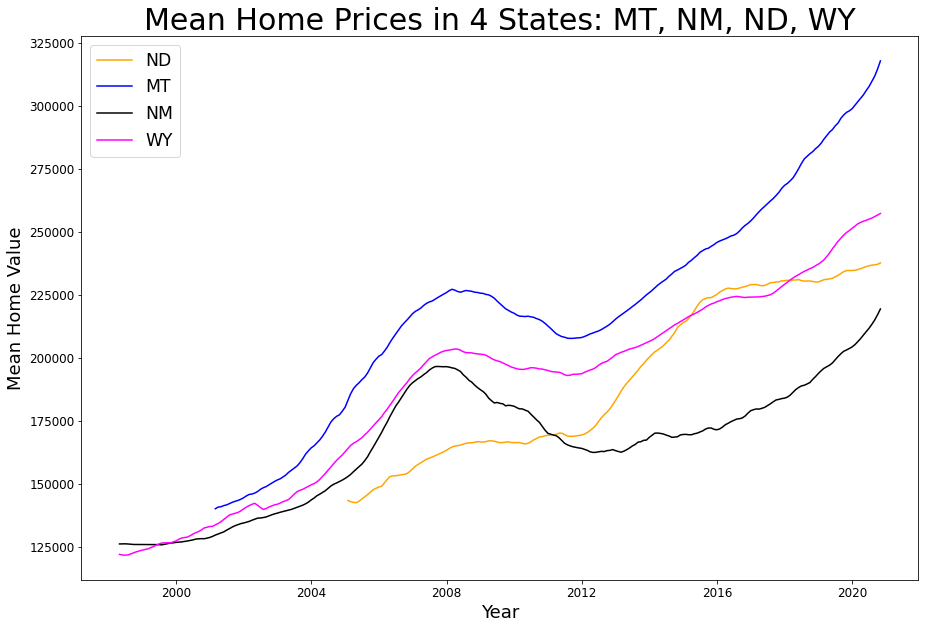

In [9]:
# Set size of visual
plt.figure(figsize = (15, 10))

# Plot the data for states Montana, New Mexico, North Dakota, Wyoming
plt.plot(states['ND'], label = 'ND', color = 'orange')
plt.plot(states['MT'], label = 'MT', color = 'blue')
plt.plot(states['NM'], label = 'NM', color = 'black')
plt.plot(states['WY'], label = 'WY', color = 'magenta')

# Create a legend
plt.legend(loc = 'upper left', fontsize = 'xx-large')

# Increase size of X and Y ticks on the visual below
plt.xticks(size = 12)
plt.yticks(size = 12)

# Label the X and Y axes
plt.xlabel('Year', size = 18)
plt.ylabel('Mean Home Value', size = 18)

# Set a title for the visual
plt.title('Mean Home Prices in 4 States: MT, NM, ND, WY', size = 30);

Looking at the visual above, the earliest available `Mean Home Value` for each state is also the lowest, and the `nulls` occur at the earliest portions of the dataset. This isn't the most ideal solution (`nulls` are never ideal), but I feel okay substituting the null values in this dataframe with the `min` value for each respective state.

In [10]:
# Fill nulls in each state's column with the minimum value in that column

states['MT'].fillna(states['MT'].min(), inplace = True)
states['NM'].fillna(states['NM'].min(), inplace = True)
states['ND'].fillna(states['ND'].min(), inplace = True)
states['WY'].fillna(states['WY'].min(), inplace = True)

# Check work -- all values should be 0
states.isna().sum()

StateName
CA    0
TX    0
NY    0
FL    0
IL    0
PA    0
OH    0
MI    0
GA    0
NC    0
NJ    0
VA    0
WA    0
MA    0
IN    0
AZ    0
TN    0
MO    0
MD    0
WI    0
MN    0
CO    0
AL    0
SC    0
LA    0
KY    0
OR    0
OK    0
CT    0
IA    0
MS    0
AR    0
KS    0
UT    0
NV    0
NM    0
WV    0
NE    0
ID    0
HI    0
ME    0
NH    0
RI    0
MT    0
DE    0
SD    0
AK    0
ND    0
VT    0
DC    0
WY    0
dtype: int64

#### USA Total and USA Average

For comparison purposes, let's create 2 new columns in this dataset -- `USA_Total` and `USA_Average`.

In [11]:
# Define a function to create a dataframe with 2 column -- US Totals and US Averages for all states
def totals_and_averages(df):
    
    # Create new dataframe with the 2 columns, set the index to be equal to the inputted dataframe's index
    usa = pd.DataFrame(columns = ['USA_Total', 'USA_Average'], index = states.index)
    
    # Create 2 empty lists -- one for each column
    usa_totals = []
    usa_averages = []
    
    # Begin for loop through the inputted dataframe's rows
    for row in df.index:
        
        # Start a counter with beginning value = 0
        row_sum = 0
        
        # Loop through each column of the specified row to target the individual cells
        for column in states.columns:
            
            # Add each cell's value to 'row_sum'
            row_sum += states[column][row]
        
        # Add the row's sum of values to the empty list 'usa_totals'
        usa_totals.append(row_sum)
    
    # Start for loop through newly created list 'usa_totals'
    for i in usa_totals:
        
        # Create a mean value for each number by dividing the value by the number of columns in the inputted 
        #/n dataframe, and round the value to 2 decimal places
        average = round(i / len(df.columns), 2)
        
        # Add the mean value to the empty list 'usa_averages'
        usa_averages.append(average)
    
    # Add the values in the lists to the empty columns in the new dataframe 'usa'
    usa['USA_Total'] = usa_totals
    usa['USA_Average'] = usa_averages
    
    # Return the newly created dataframe
    return usa
        

In [12]:
# Call the function and set it equal to variable 'usa'
usa = totals_and_averages(states)

# Check work
usa

,USA_Total,USA_Average
date,,
1996-01-31,5904338.0,115771.33
1996-02-29,5905373.0,115791.63
1996-03-31,5906768.0,115818.98
1996-04-30,5910688.0,115895.84
1996-05-31,5914977.0,115979.94
...,...,...
2020-06-30,13584708.0,266366.82
2020-07-31,13660764.0,267858.12
2020-08-31,13759242.0,269789.06


In [13]:
# Combine the 2 dataframe 'states' and 'usa', join them on their identical axes
states = pd.concat([states, usa], axis = 1)

# Check work
states

,CA,TX,NY,FL,IL,PA,OH,MI,GA,NC,...,MT,DE,SD,AK,ND,VT,DC,WY,USA_Total,USA_Average
date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,160283.0,99737.0,142323.0,100274.0,142962.0,97639.0,92741.0,91049.0,103064.0,110705.0,...,140256.0,131787.0,86986.0,120532.0,142659.0,109173.0,165472.0,121890.0,5904338.0,115771.33
1996-02-29,160056.0,99762.0,142000.0,100370.0,142704.0,97571.0,92853.0,91374.0,103223.0,110919.0,...,140256.0,131731.0,87391.0,120938.0,142659.0,109162.0,164719.0,121890.0,5905373.0,115791.63
1996-03-31,159909.0,99791.0,141811.0,100481.0,142378.0,97503.0,92999.0,91685.0,103386.0,111112.0,...,140256.0,131671.0,87353.0,121203.0,142659.0,109074.0,164054.0,121890.0,5906768.0,115818.98
1996-04-30,159622.0,99920.0,141524.0,100691.0,141996.0,97392.0,93305.0,92354.0,103738.0,111511.0,...,140256.0,131529.0,87411.0,121850.0,142659.0,108938.0,162915.0,121890.0,5910688.0,115895.84
1996-05-31,159428.0,100060.0,141418.0,100891.0,141471.0,97292.0,93624.0,93015.0,104091.0,111906.0,...,140256.0,131645.0,87198.0,122349.0,142659.0,108754.0,162022.0,121890.0,5914977.0,115979.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,574440.0,218140.0,339409.0,254983.0,211552.0,203877.0,157390.0,179247.0,210347.0,213297.0,...,307556.0,263610.0,217540.0,282702.0,236555.0,264691.0,634428.0,255013.0,13584708.0,266366.82
2020-07-31,578358.0,219241.0,341277.0,256235.0,212542.0,205238.0,158455.0,180213.0,211620.0,214667.0,...,309622.0,265977.0,218167.0,283105.0,236786.0,265791.0,635434.0,255434.0,13660764.0,267858.12
2020-08-31,584544.0,220550.0,343647.0,257962.0,213879.0,207022.0,159823.0,181880.0,213016.0,216190.0,...,311727.0,268272.0,219119.0,283165.0,236921.0,266643.0,638556.0,256037.0,13759242.0,269789.06


#### Creating a visual comparison of each state's financial data with the National average

This will give us (aurguably too) many graphs and a good visual representation of each state's data for residential real estate financial prices compared to the National average.

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


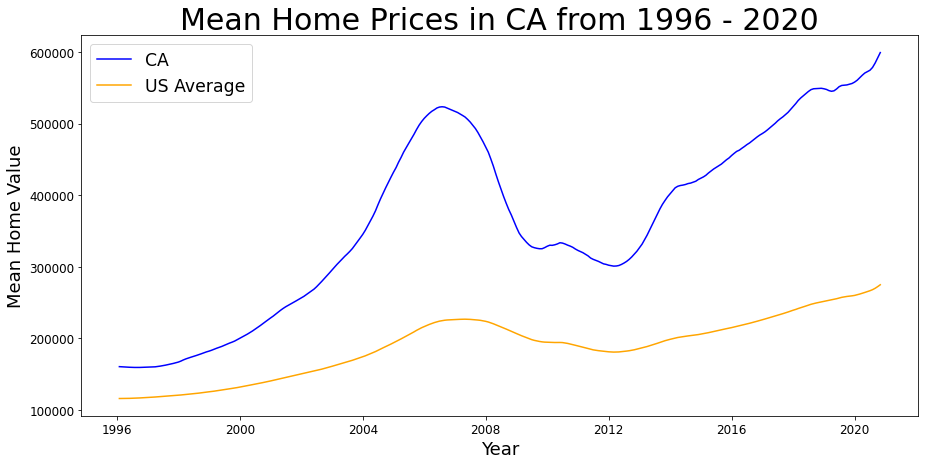

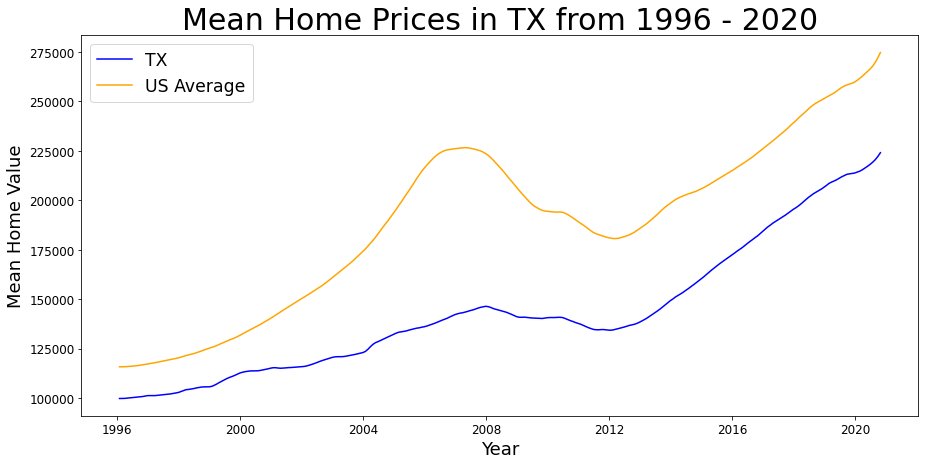

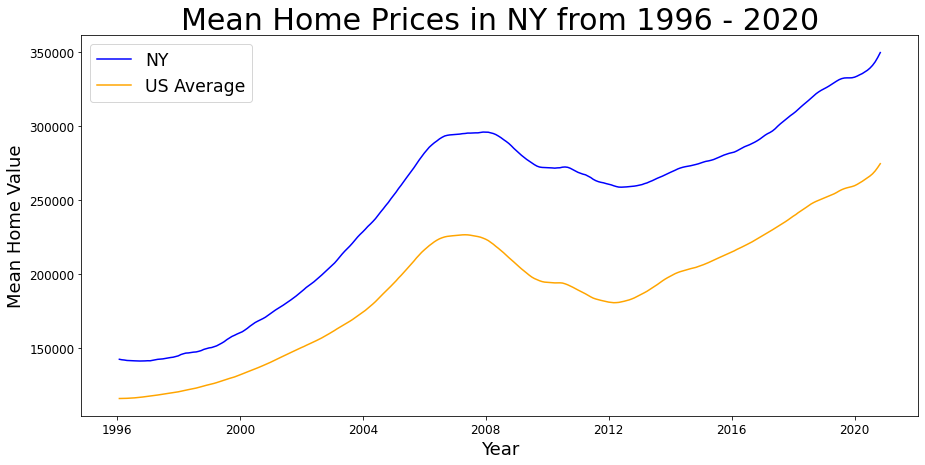

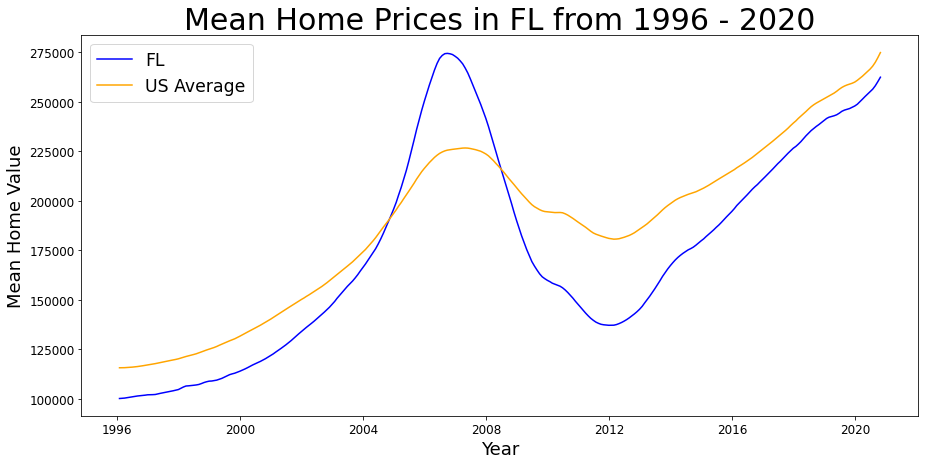

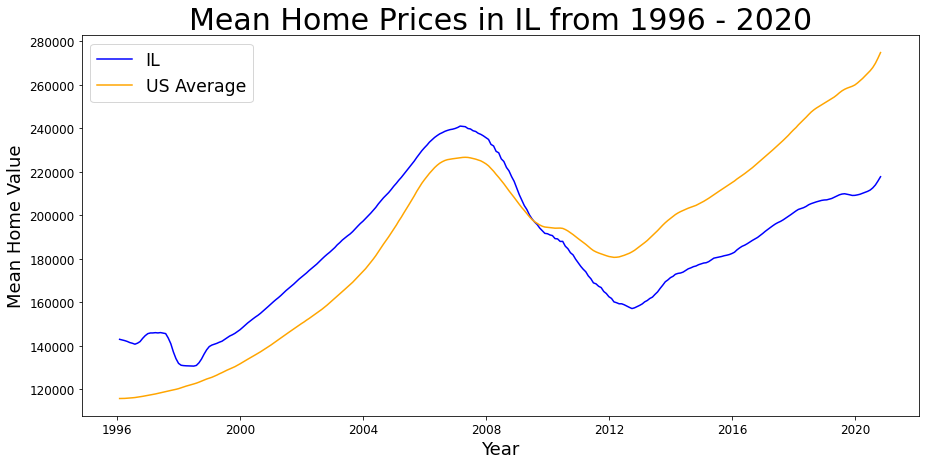

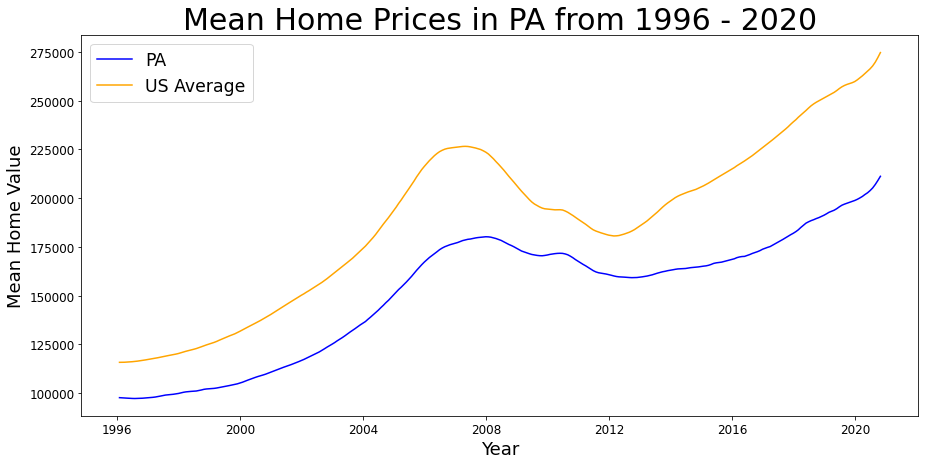

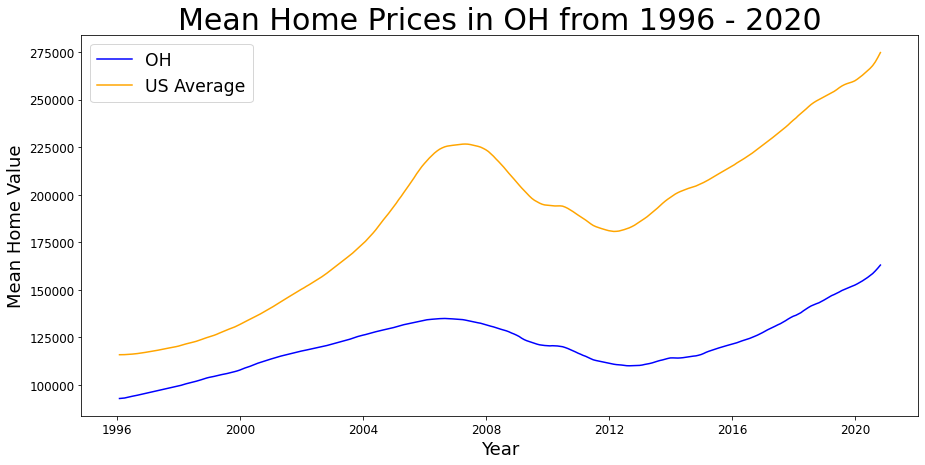

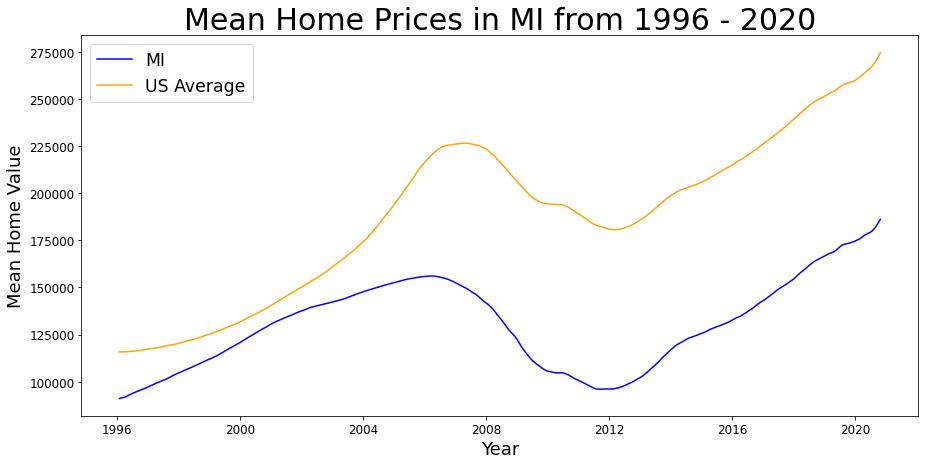

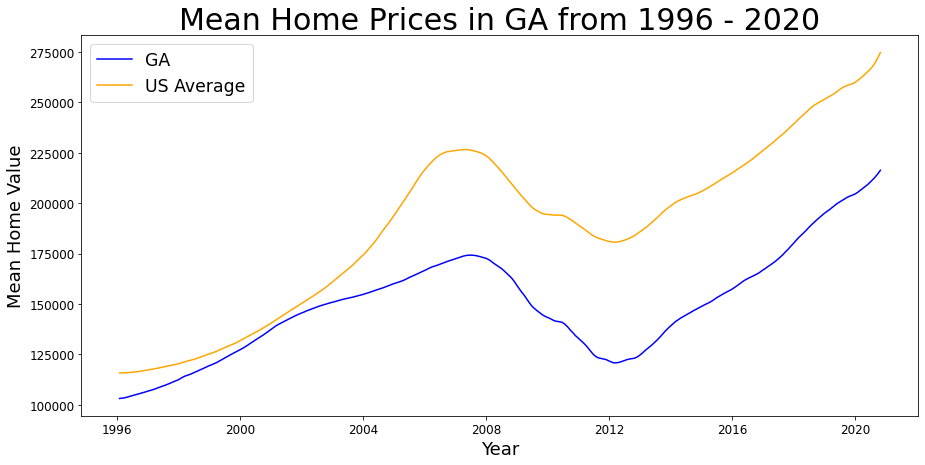

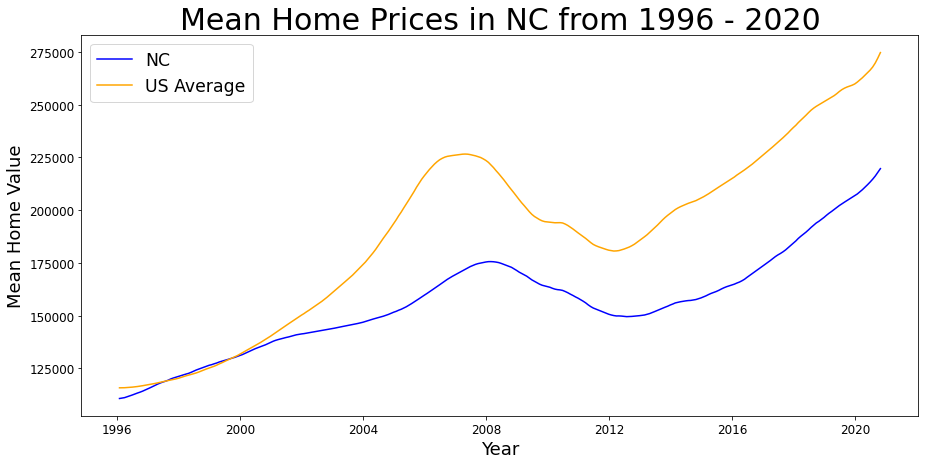

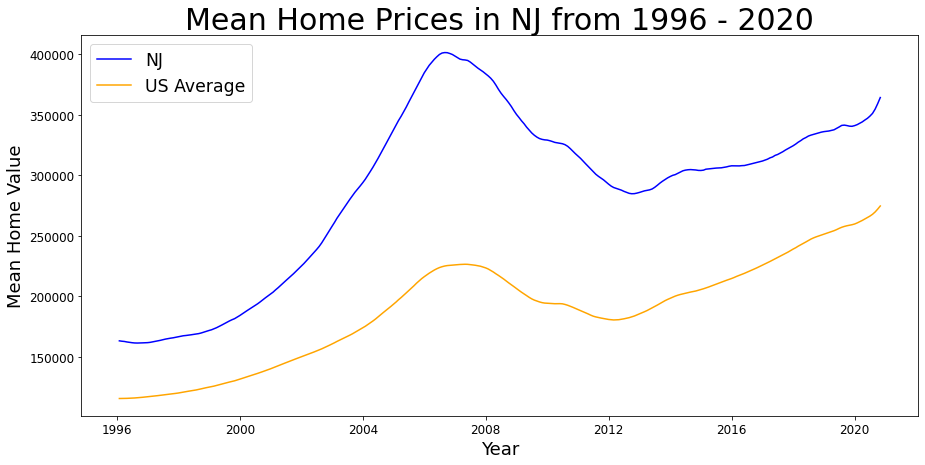

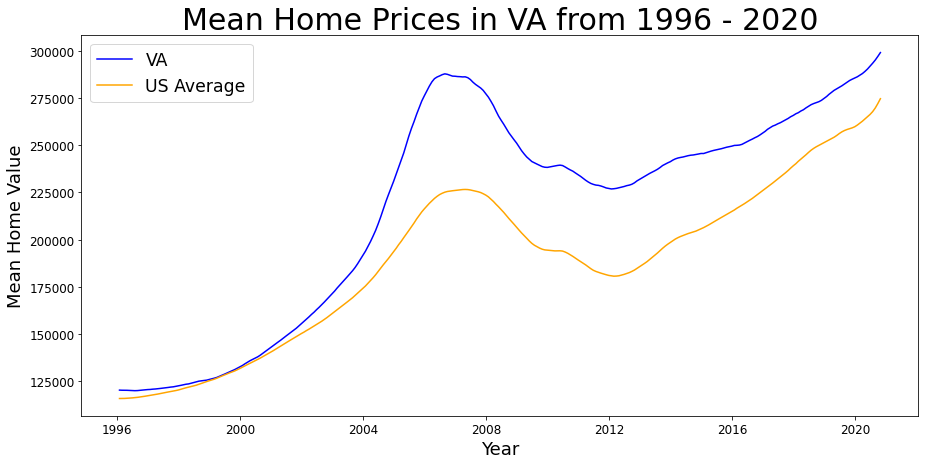

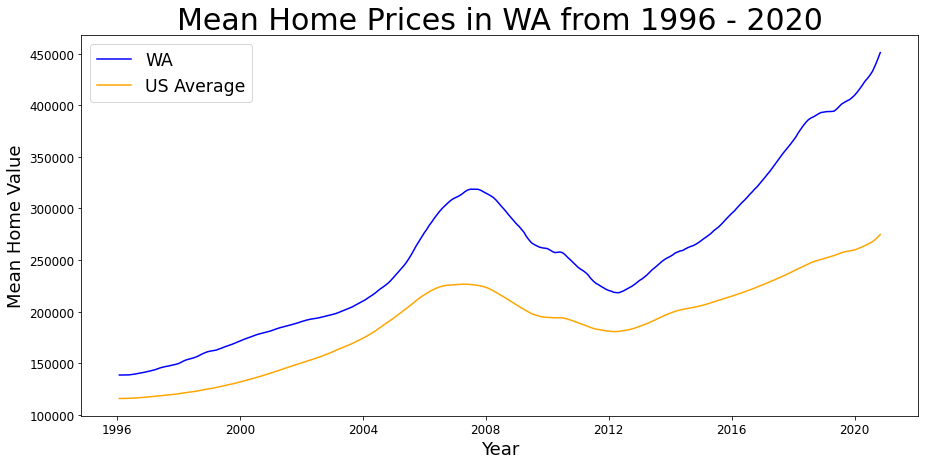

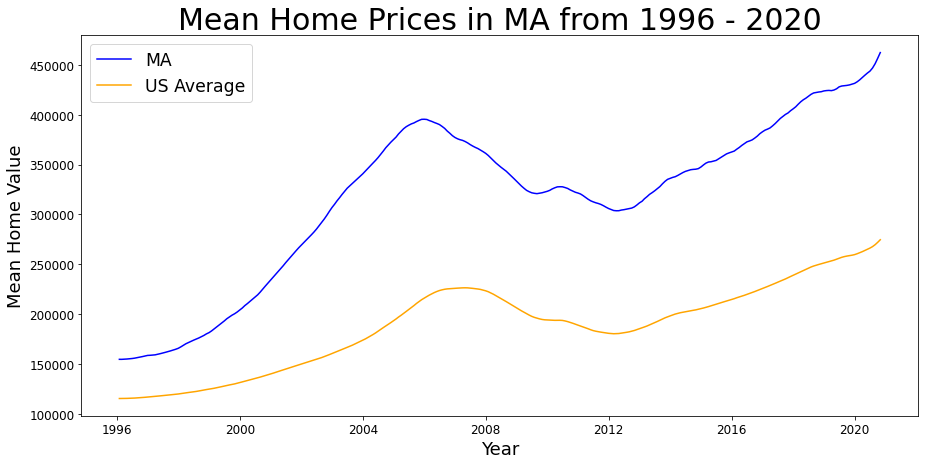

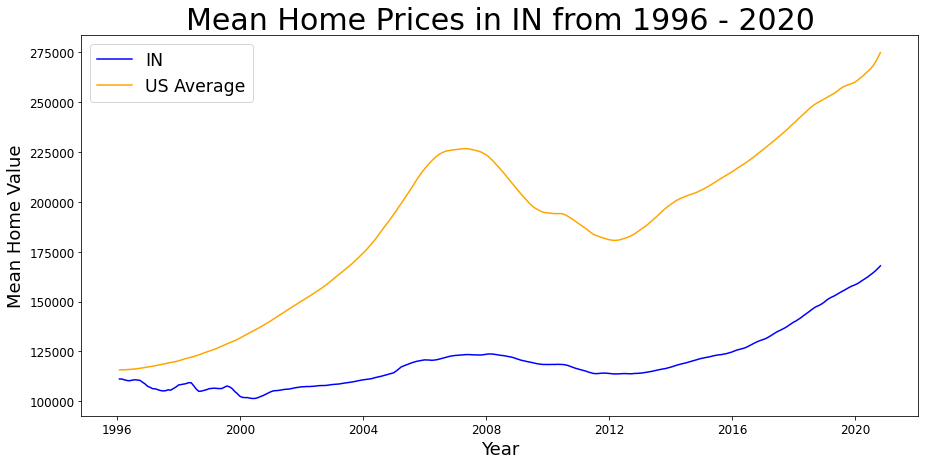

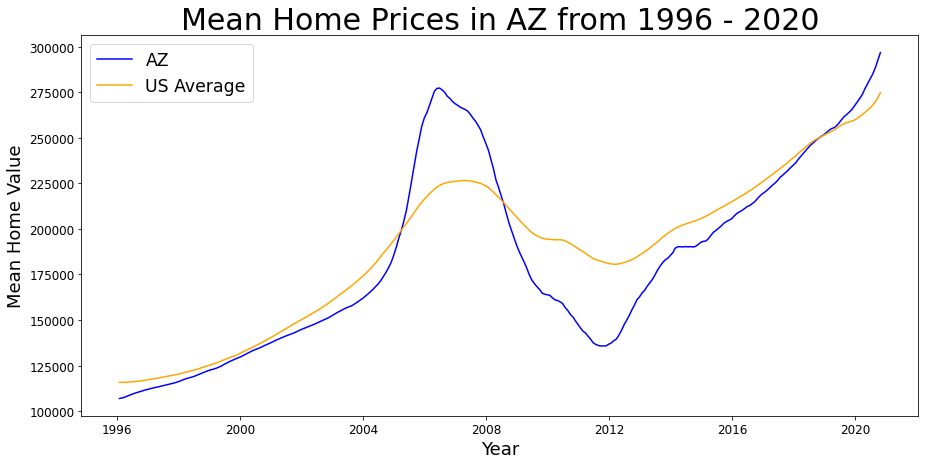

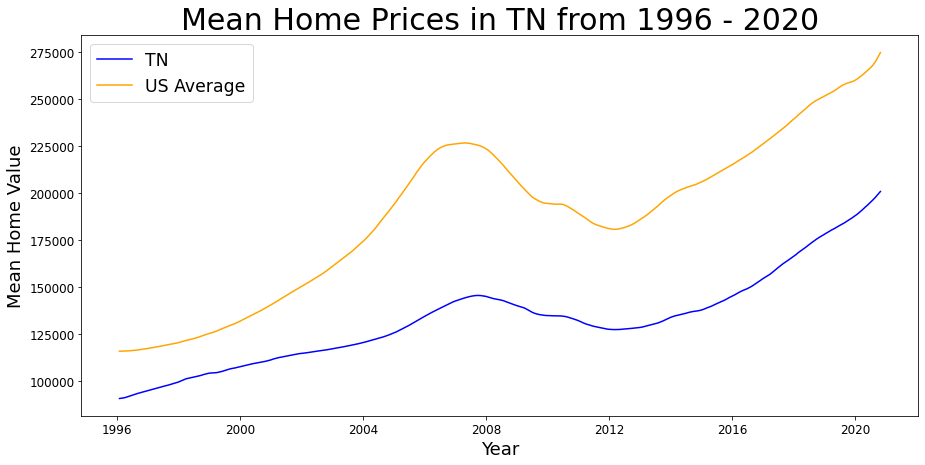

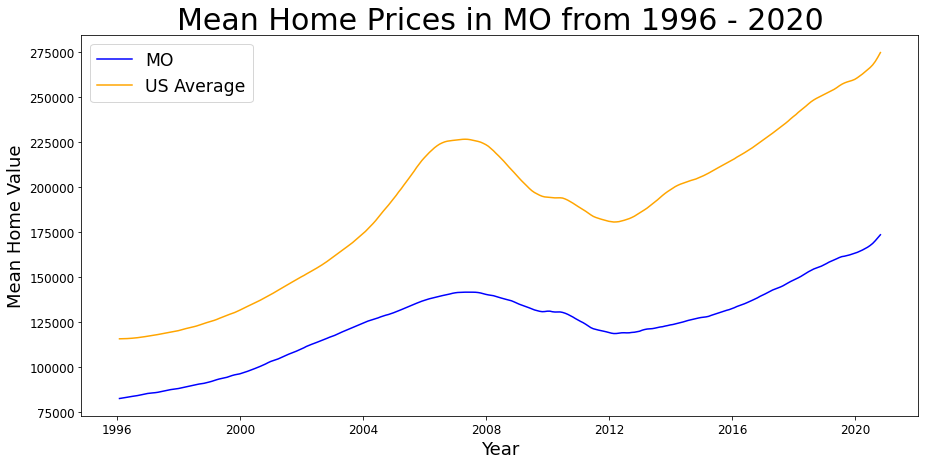

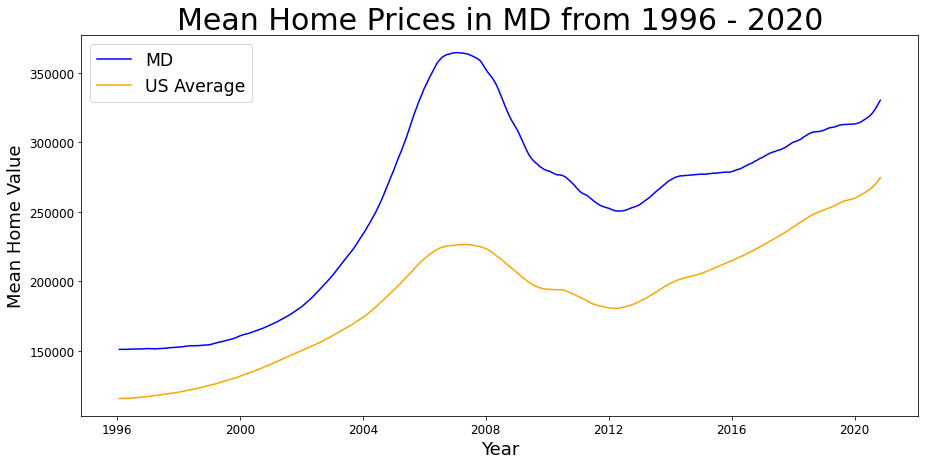

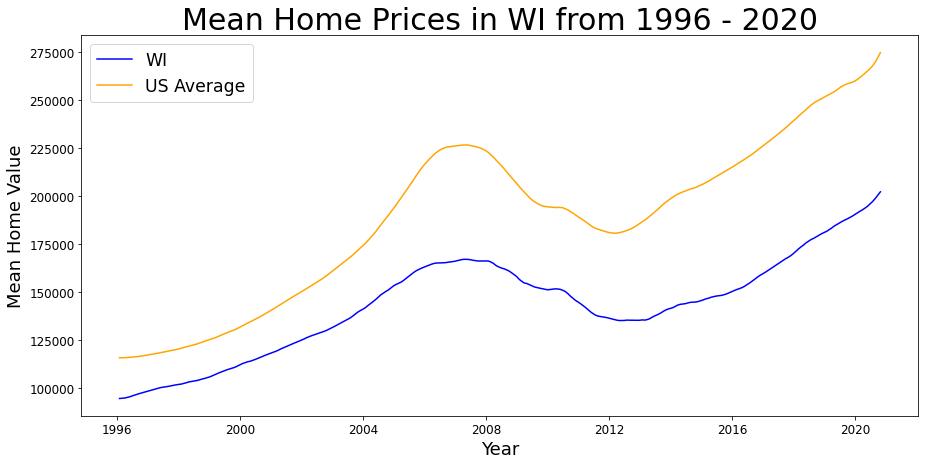

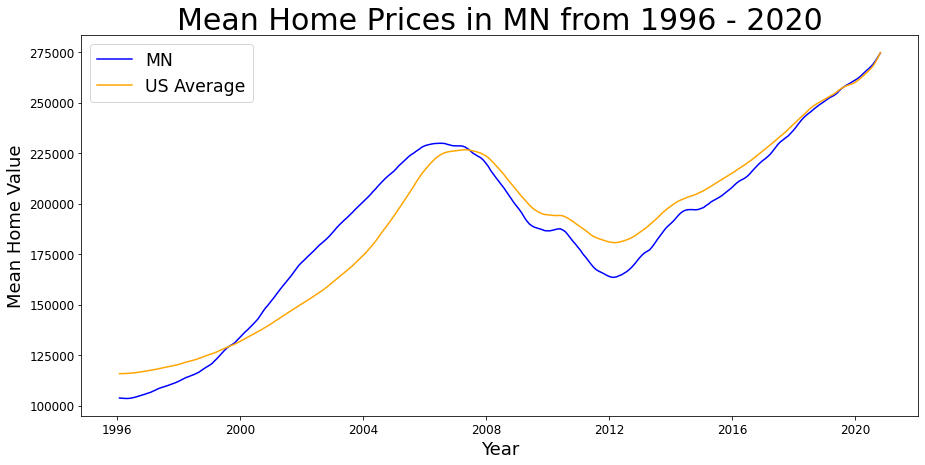

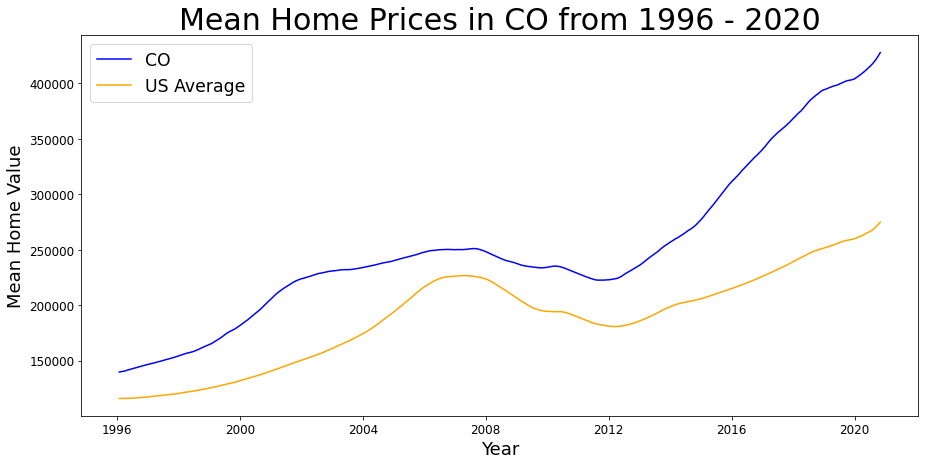

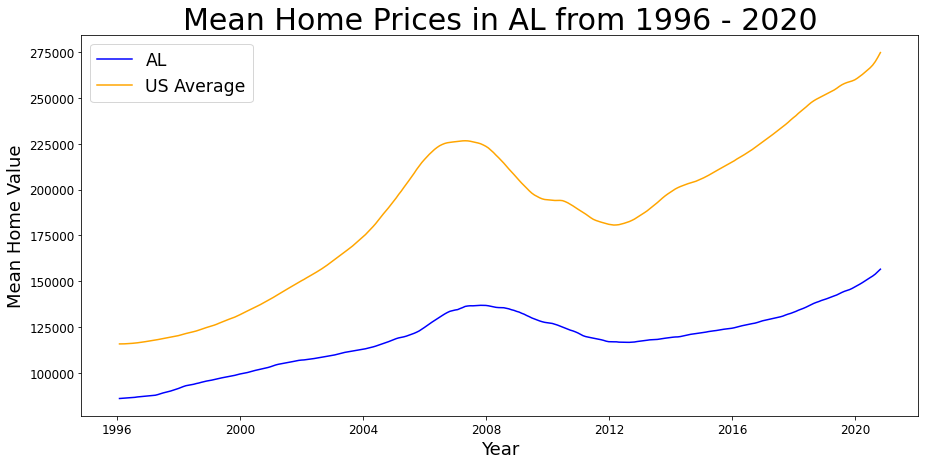

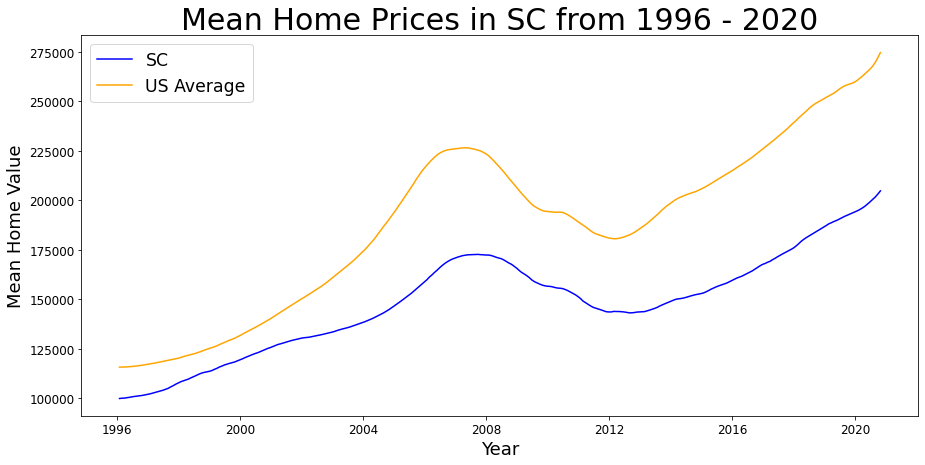

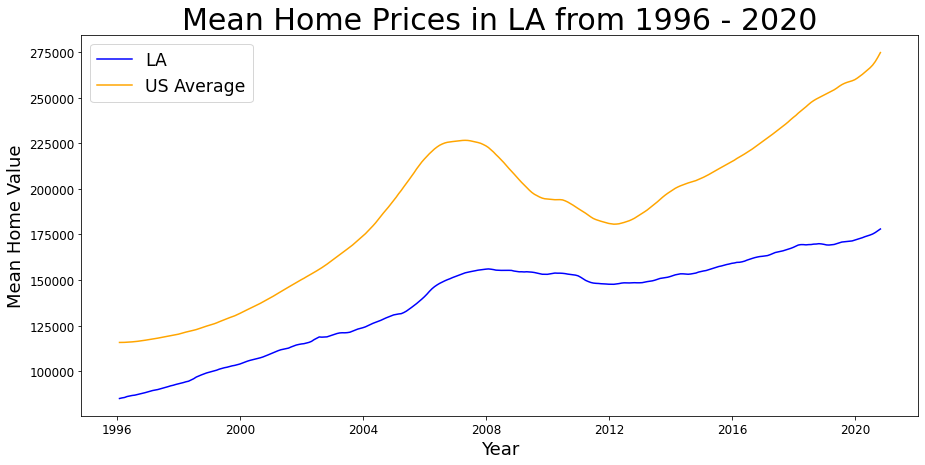

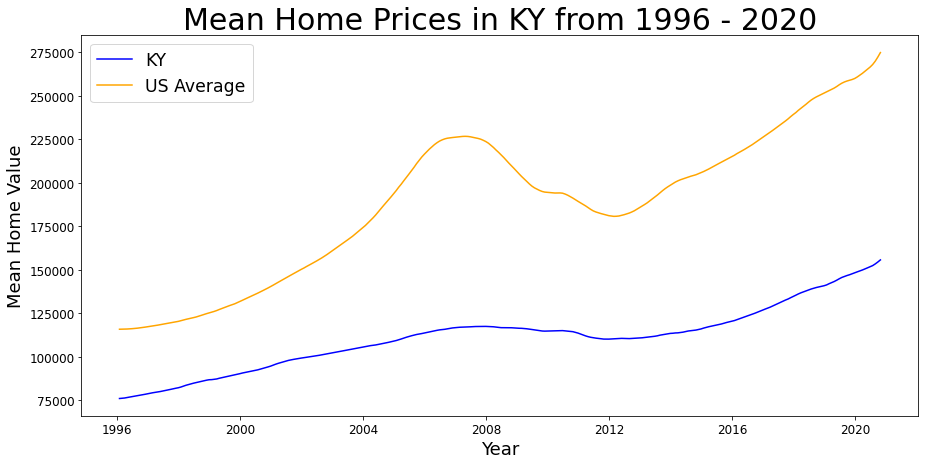

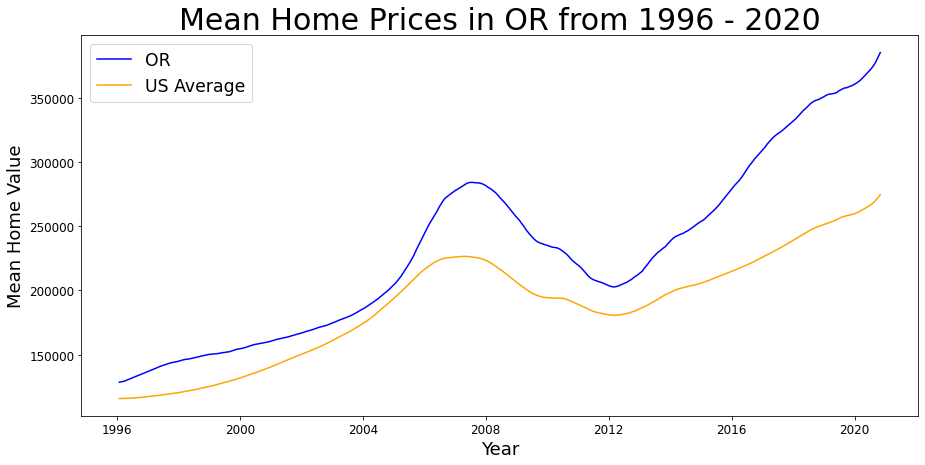

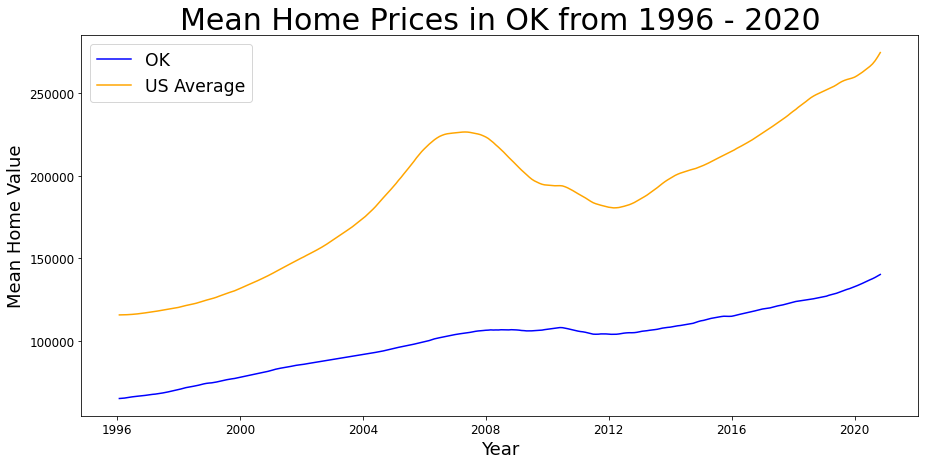

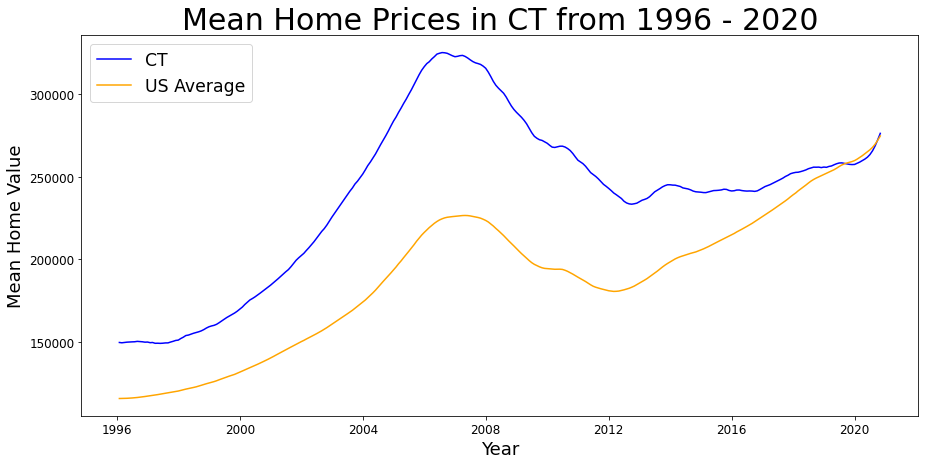

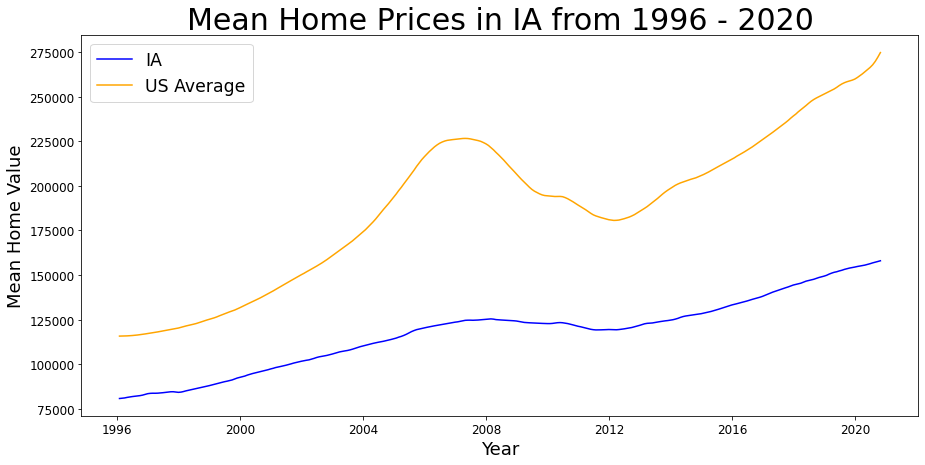

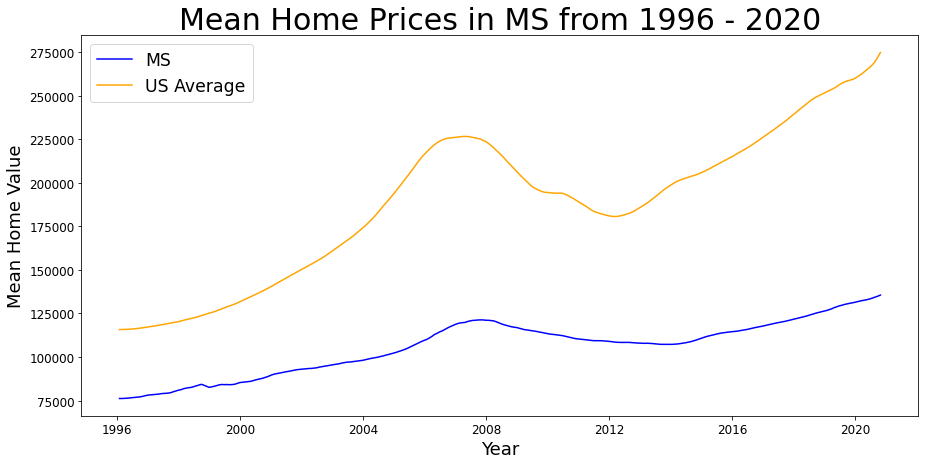

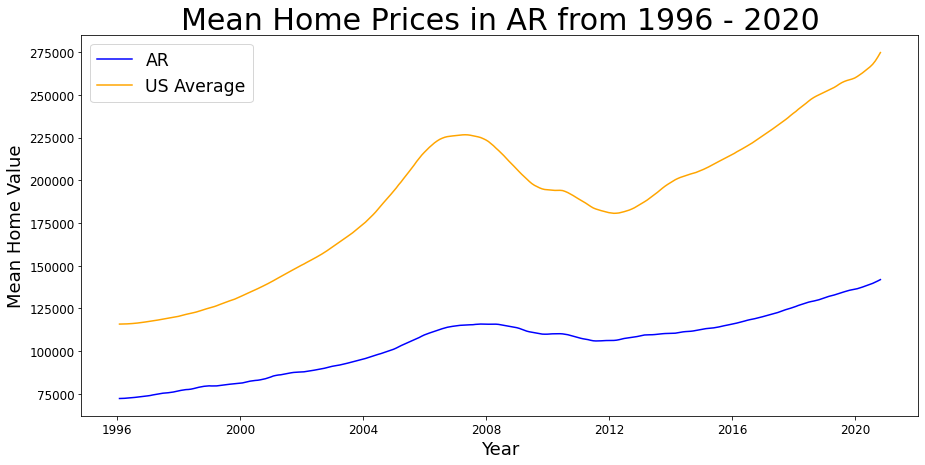

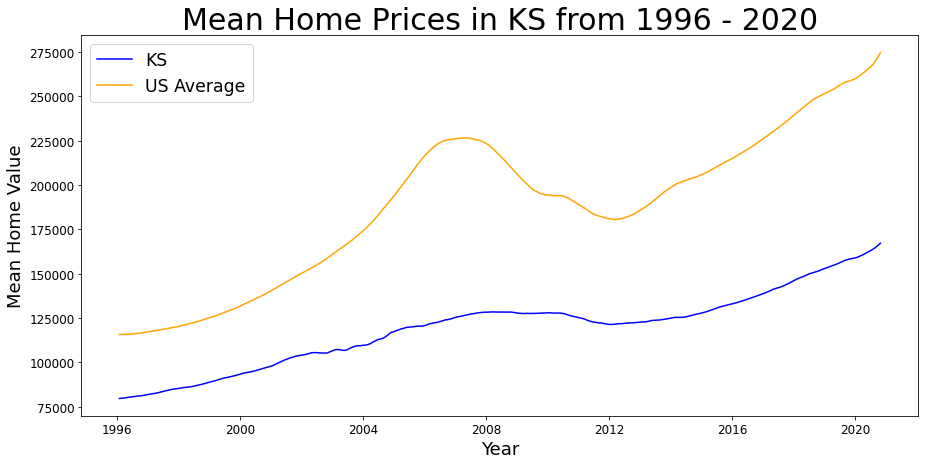

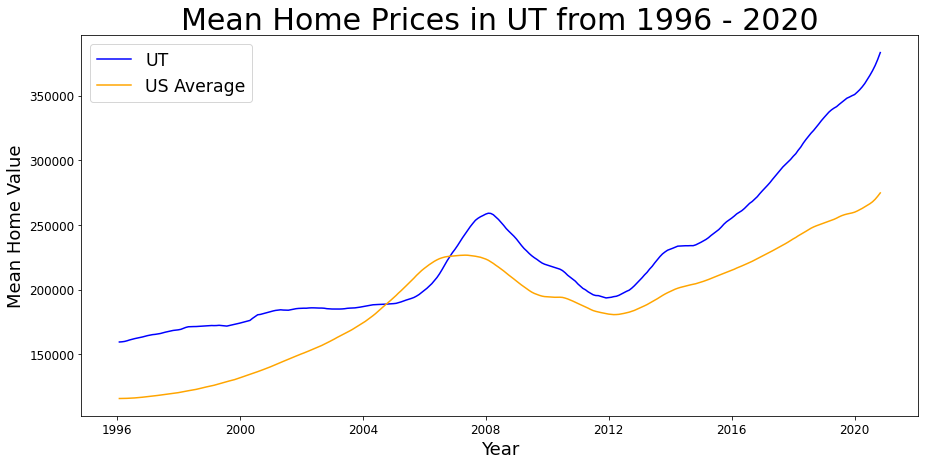

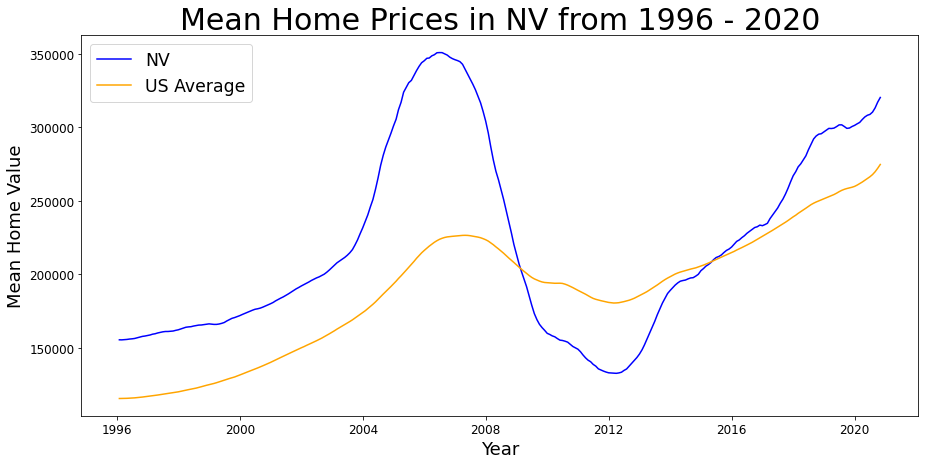

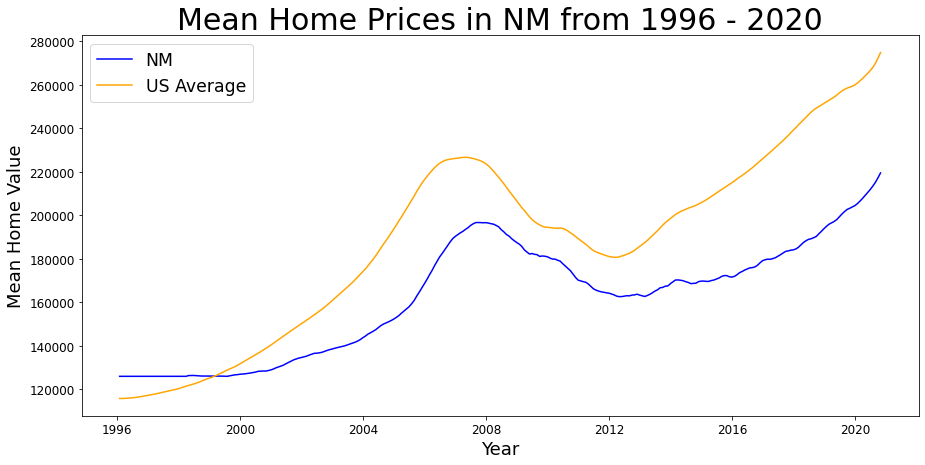

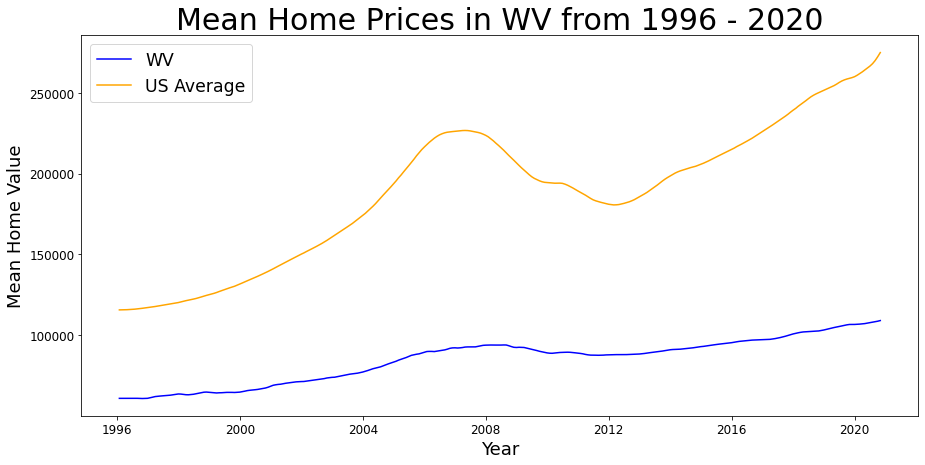

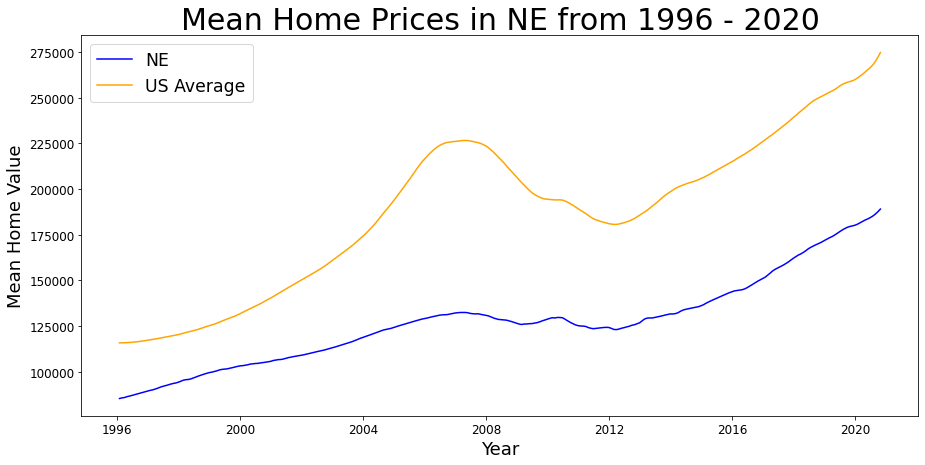

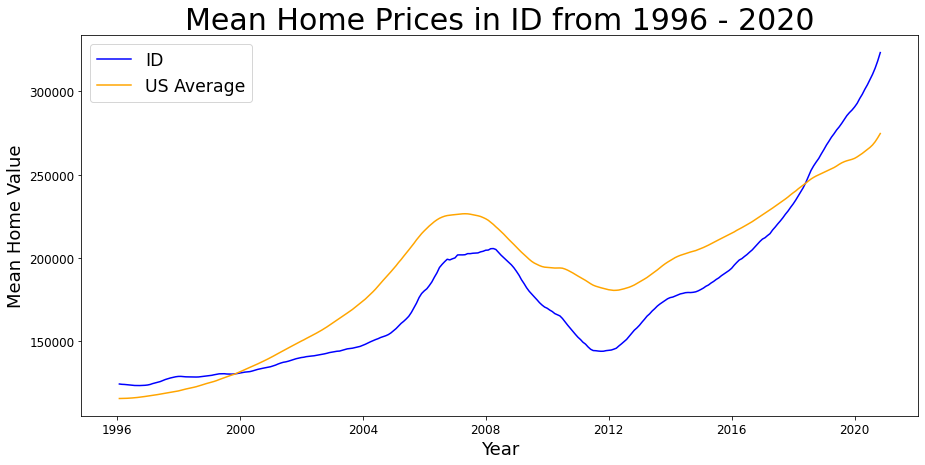

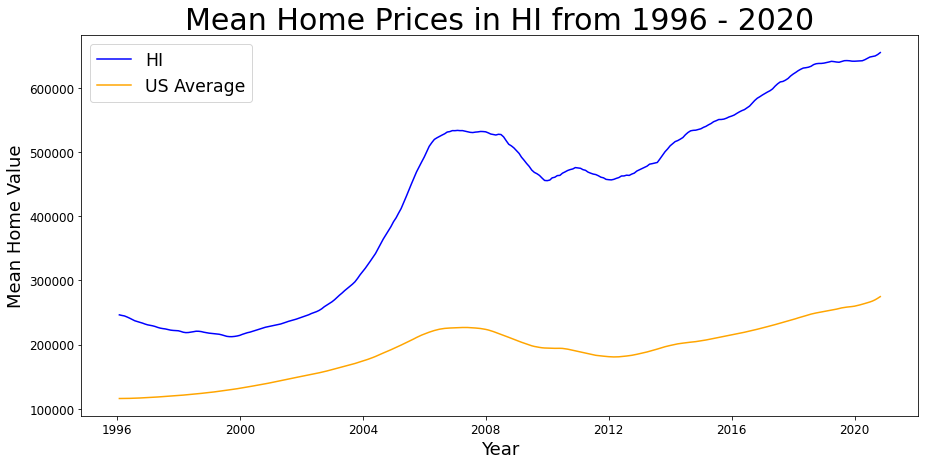

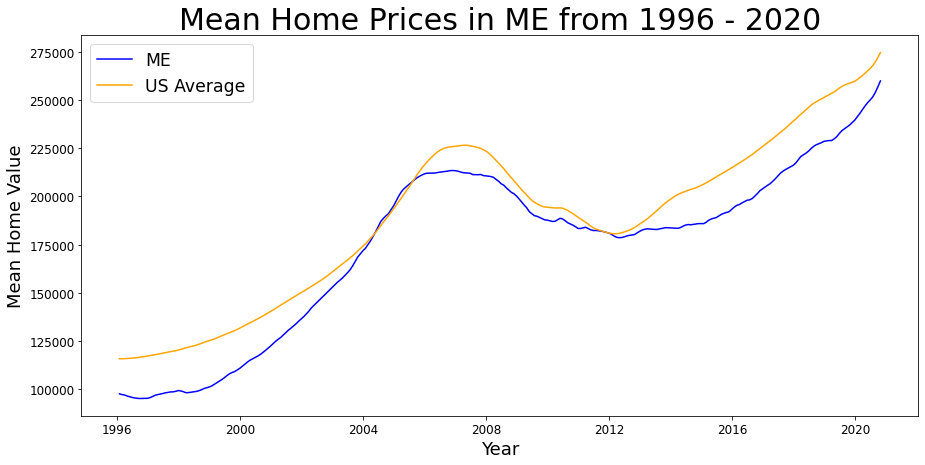

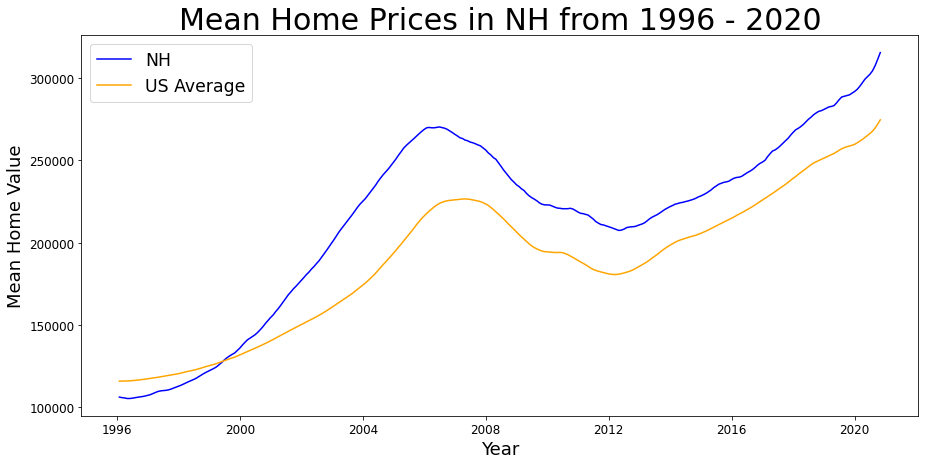

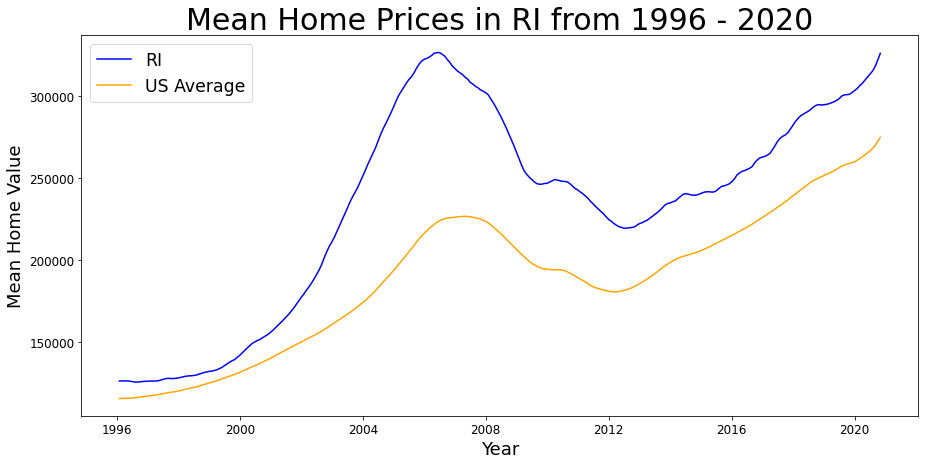

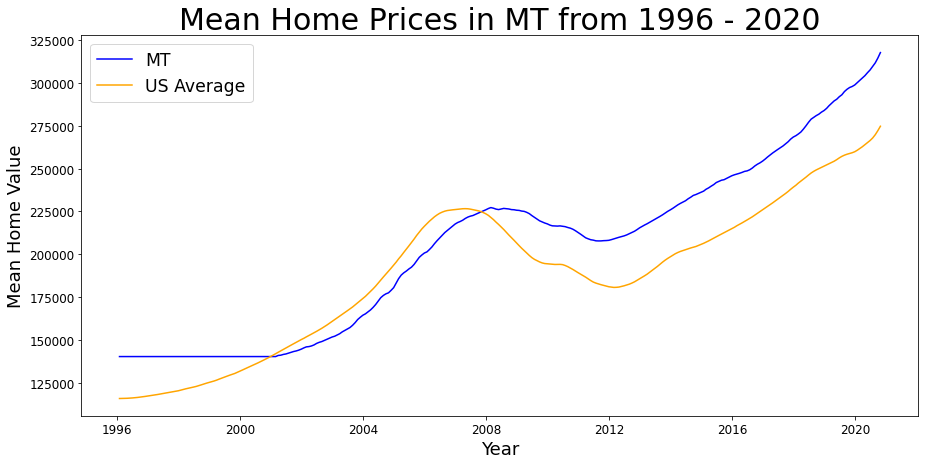

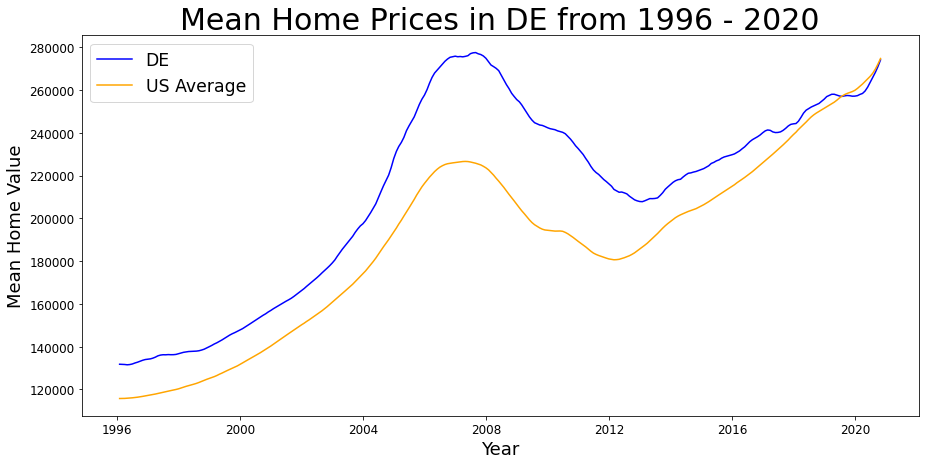

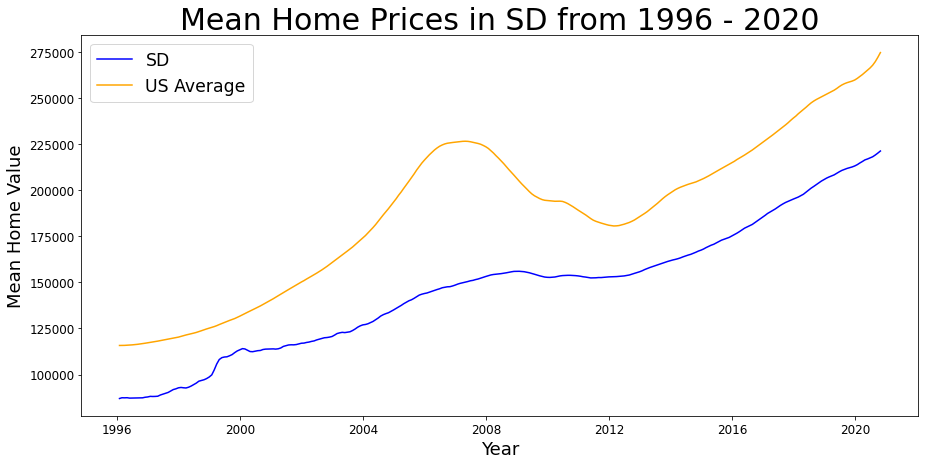

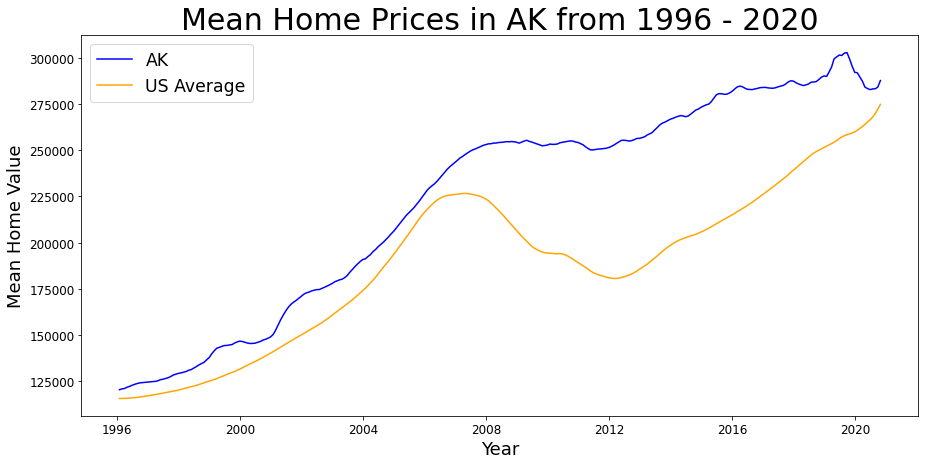

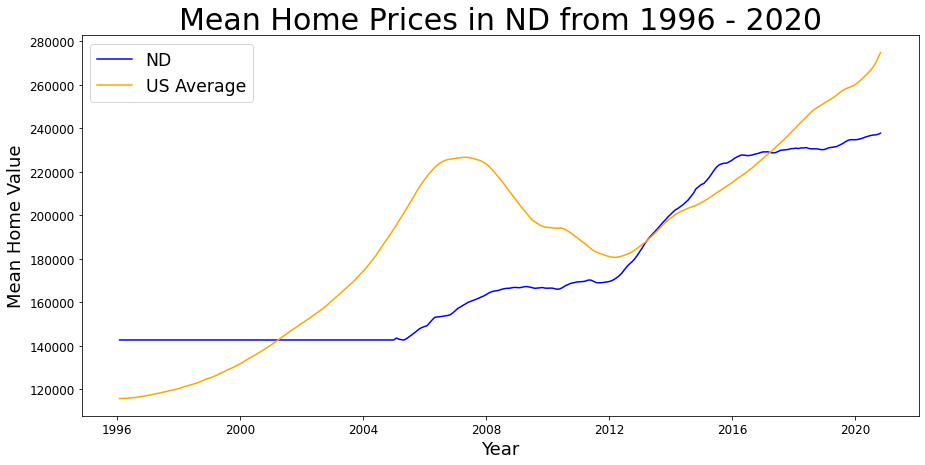

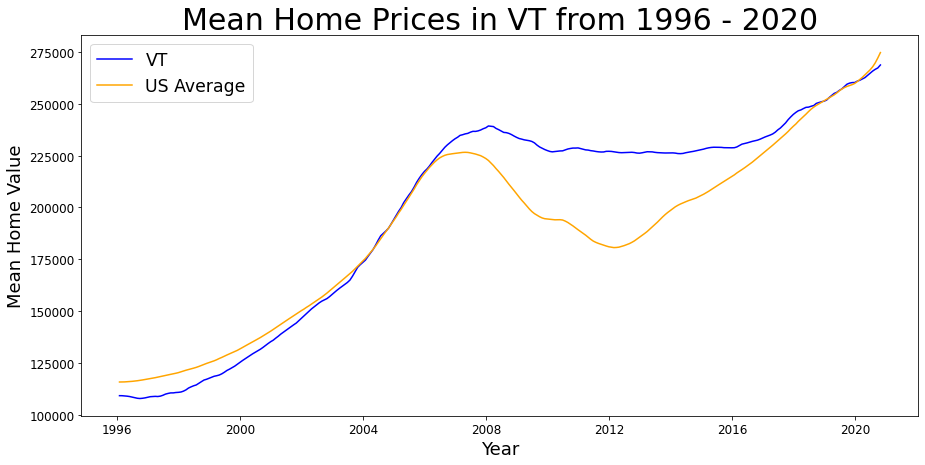

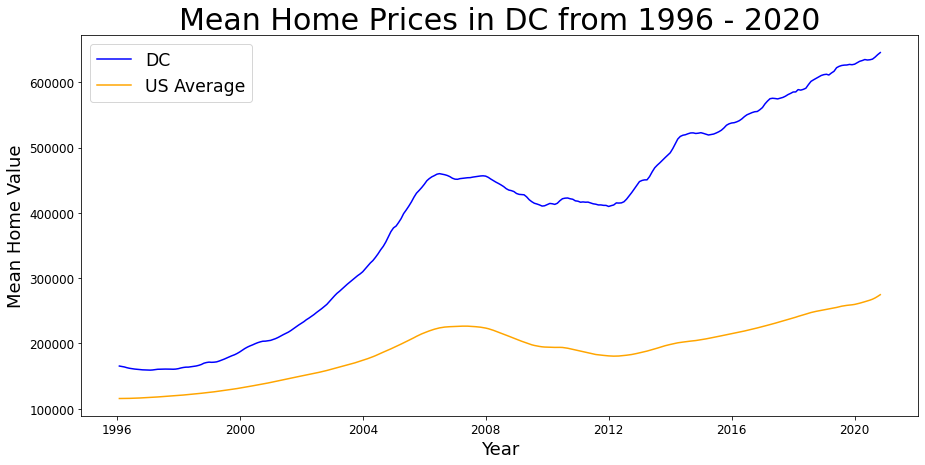

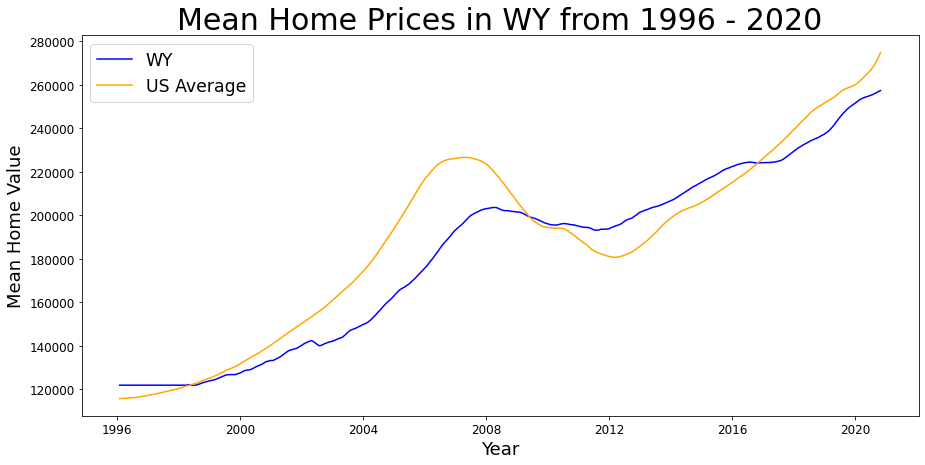

In [14]:
# Begin for loop that excludes columns 'USA_Total' and 'USA_Average'
for column in states.columns[:51]:
    
    # Set plot size
    plt.figure(figsize = (15, 7))
    
    # Set the particular state's label (state) and color (blue)
    plt.plot(states[column], label = column, color = 'blue')
    
    # Set the USA_Average's label (USA_Average) and color (orange)
    plt.plot(states['USA_Average'], label = 'US Average', color = 'orange')
    
    # Create a legend for the particular state's graph and the USA_Average
    plt.legend(loc = 'upper left', fontsize = 'xx-large')
    
    # Increase the size of the ticks on the X and Y axes
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    
    # Label the X and Y axes
    plt.xlabel('Year', size = 18)
    plt.ylabel('Mean Home Value', size = 18)
    
    # Create a title for the graph
    plt.title(f'Mean Home Prices in {column} from 1996 - 2020', size = 30);

#### A closer look at the Housing Crisis

From the graphs above, we can see that the housing bubble that caused that financial crisis burst in 2008, and the states that were impacted the greatest didn't see any kind of recovery until 2012, when om average, home values in those states bottomed out before rebounding. 

Let's take a look at average home values per state from 2008 and 2012. Let's also look at the difference between those two values and the standard deviation of home prices across the entire `states` dataset per state.

In [15]:
# Define a function to measure the impact of the housing crisis
def measure_crisis_impact(df):
    
    # Isolate values for the years 2008 and 2012 from the inputted dataframe
    year_08 = df[(df.index > '12-31-2007') & (df.index < '01-31-2009')]
    year_12 = df[(df.index > '12-31-2011') & (df.index < '01-31-2013')]
    
    # Create new dataframe with 4 columns: 08_average, 12_average, 08-12_difference, and std_dev
    state_averages = pd.DataFrame(columns = df.columns, index = ['08_average', '12_average',
                                                                  '08-12_difference', 'std_dev'])
    
    # Loop through all the states (columns) in the inputted df
    for column in df:
        
        # Calculate and define the mean home value for the years 2008 and 2012
        average_08 = np.mean(year_08[column])
        average_12 = np.mean(year_12[column])
        
        # Calculate the standard deviation for each state across the entire dataset (not just 2008 and 2012)
        state_std = np.std(states[column])
        
        # Add each calculated variable to the appropriate columns in the new dataframe 'state_averages'
        state_averages[column]['08_average'] = average_08
        state_averages[column]['12_average'] = average_12
        state_averages[column]['08-12_difference'] = average_08 - average_12
        state_averages[column]['std_dev'] = state_std
    
    # Return the dataframe 'state_averages'
    return state_averages
    

In [16]:
# Call function and set it equal to variable name 'fin_crisis'
fin_crisis = measure_crisis_impact(states)

# Drop the column 'USA_Total' from the dataframe
fin_crisis.drop(columns = ['USA_Total'], inplace = True)

# Transpose the dataframe again so that the axes are switched
fin_crisis = fin_crisis.T

# Sort values based on the biggest differences in average 2008 and 2012 residential home value,
#/n thereby sorting the states by the ones that were the most impacted by the housing crises from the 
#/n perspectvie of average home prices
fin_crisis.sort_values(by = ['08-12_difference'], ascending = False)

,08_average,12_average,08-12_difference,std_dev
NV,253808,137067,116741,64554.4
CA,405337,309124,96213.2,128129
NJ,366798,287118,79680.5,70586.1
MD,330751,252147,78603.9,65610.2
WA,300551,222390,78161.2,77127.8
FL,213779,140265,73513.9,51786.5
AZ,216134,149132,67001.8,51742.7
IL,224644,158838,65805.8,29892.9
CT,300870,236255,64615.4,49675.2
RI,284531,220762,63769.4,62190.9


Amazingly, the home prices in 2 states seemed to have had an **inverse** relationship with the housing crisis! On average, home prices in Alaska and North Dakota **increased** from 2008 to 2012, while they **decreased** in the other 48 states and the District of Columbia.

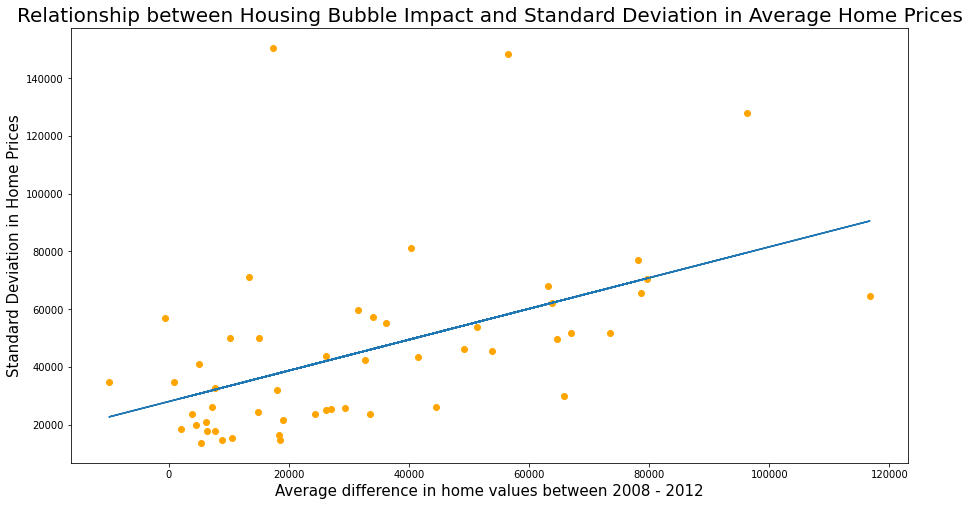

In [50]:
# Create large plot size
plt.figure(figsize = (15, 8))

# Create scatter plot, color the data orange
plt.scatter(fin_crisis['08-12_difference'], fin_crisis['std_dev'], color = 'orange')

# Label the X and Y axes
plt.xlabel('Average difference in home values between 2008 - 2012', size = 15)
plt.ylabel('Standard Deviation in Home Prices', size = 15)

# Title the plot
plt.title('Relationship between Housing Bubble Impact and Standard Deviation in Average Home Prices',
          size = 20);

# Create a line of best fit
x = np.array(fin_crisis['08-12_difference'].astype(float)) # these columns were somehow converted to objects
y = np.array(fin_crisis['std_dev'].astype(float)) # these columns were somehow converted to objects
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b);

The graph above shows ths relationship between the standard deviation of hoem prices in each state across a 25 year horizon and the impact of the housing crisis on the states' average home prices over a 4 year horizon (2008 - 2012). This scatterplot, and the blue line of best fit tha runs through the plotted points, suggests that there isn't a strong relatoinship between these two variables. Although the housing crises hit some states harder than others, variability in the data was still independently present, regardless of the impact of the housing bubble. I suppose this goes to show how everchanging real estate markets are, regardless of their susceptability to market downturns.